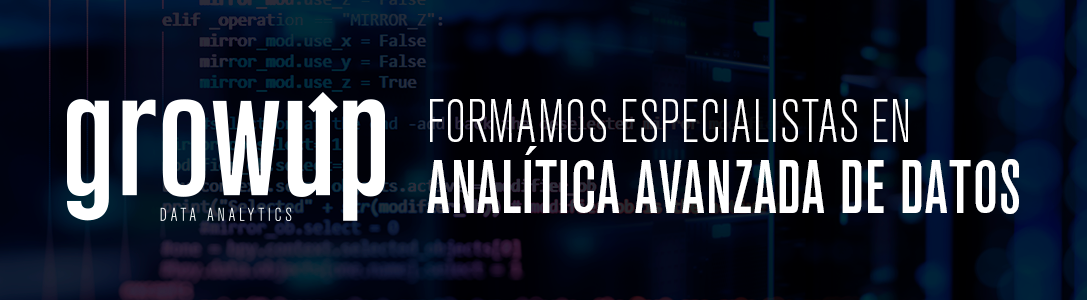

# **Forecast de Ventas por Pa√≠s y Categor√≠a de Tarjeta: Predicci√≥n Basada en Series Temporales**

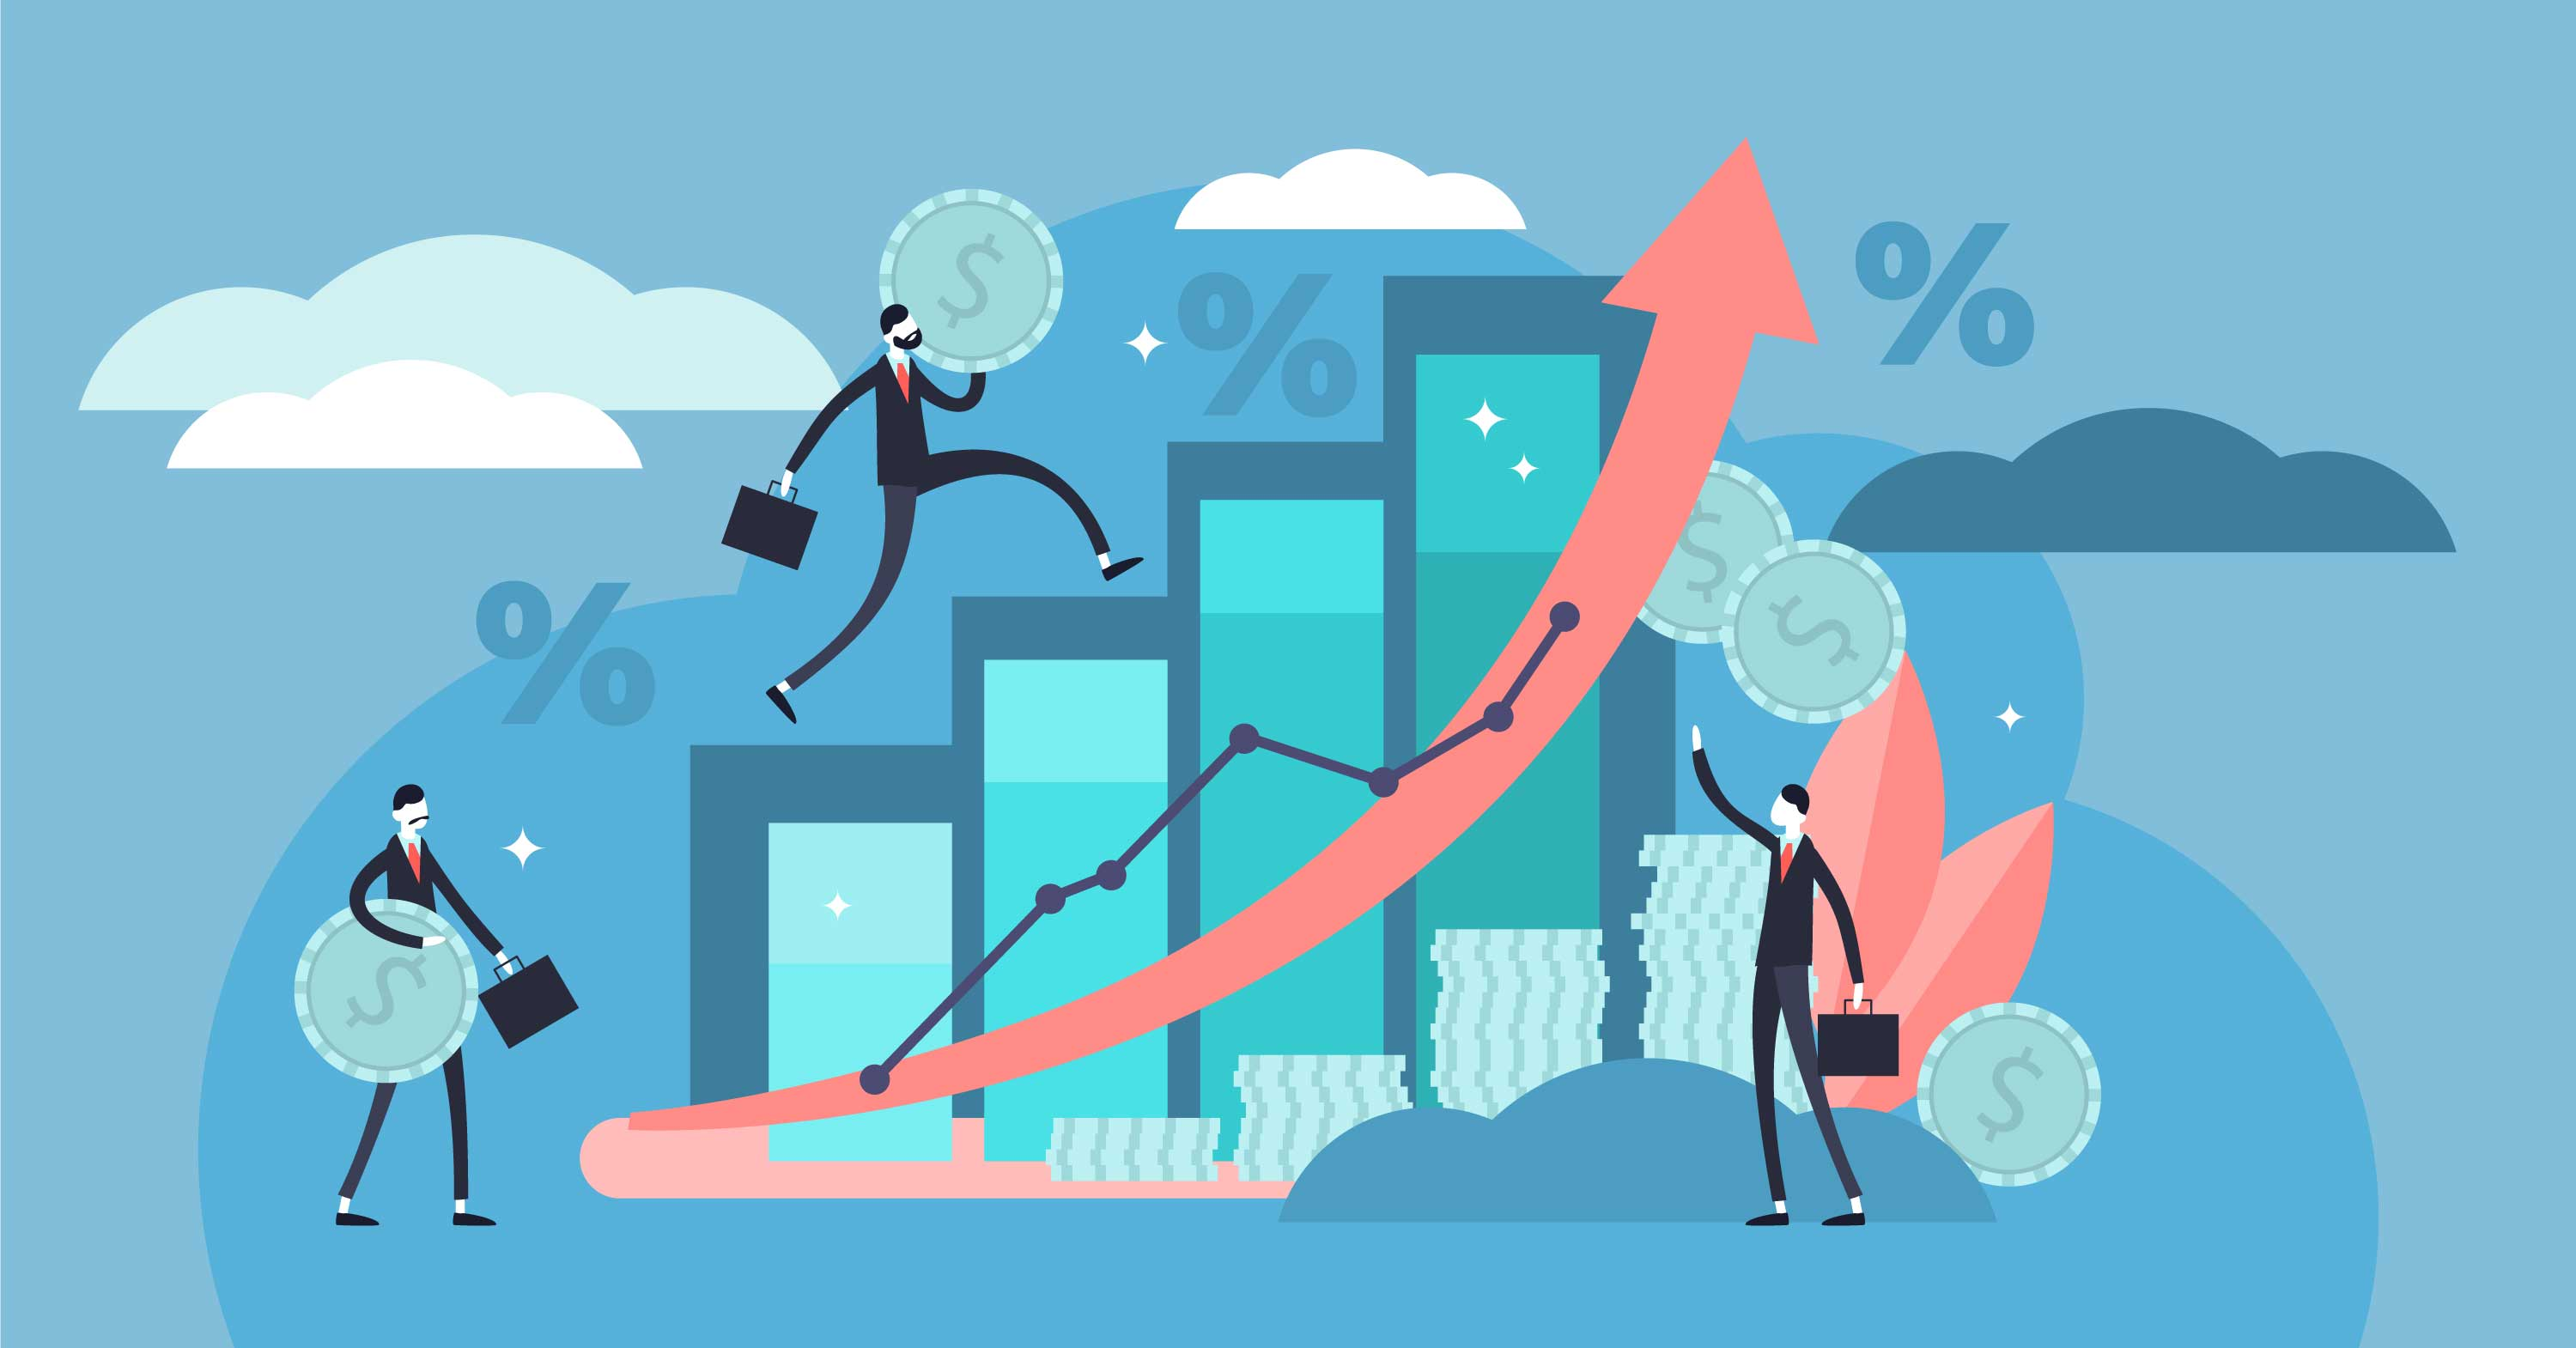

## **Definici√≥n del problema**

El forecasting (pron√≥stico) es una t√©cnica de an√°lisis predictivo que busca predecir valores futuros bas√°ndose en datos hist√≥ricos. Se utiliza en una variedad de campos como finanzas, ventas, meteorolog√≠a, entre otros. En este proyecto, el objetivo principal es realizar un an√°lisis de series temporales para predecir las ventas futuras. Utilizando los datos hist√≥ricos proporcionados, aplicaremos diferentes m√©todos de forecasting, como descomposici√≥n de series temporales, modelos de regresi√≥n y algoritmos avanzados como LightGBM. Este an√°lisis permitir√° a la empresa anticipar tendencias y ajustar sus estrategias comerciales.

**Objetivo del Proyecto:**

El objetivo del forecast es predecir el comportamiento de las ventas en el futuro, utilizando como base la informaci√≥n de fecha del pedido, categor√≠a de tarjeta, pa√≠s, y ventas. Esto permitir√° obtener informaci√≥n sobre posibles incrementos o descensos en las ventas en distintos periodos, lo que permitir√° a la empresa tomar decisiones estrat√©gicas basadas en datos.

**Descripci√≥n del Dataset:**

El dataset que vamos a utilizar contiene informaci√≥n detallada de las ventas por fecha, categorizadas por tarjeta y pa√≠s. A continuaci√≥n, se presenta una descripci√≥n de las principales columnas:

* **Fecha Pedido:** Indica el d√≠a en que se realiz√≥ el pedido. Esta ser√° la variable temporal clave para el an√°lisis de forecasting.
* **Categor√≠a Tarjeta:** Tipo de tarjeta utilizada para la compra, con valores como 'Azul', 'Oro', 'Plata', entre otros.
* **Pa√≠s:** Pa√≠s en el que se realiz√≥ la venta. Esto permitir√° analizar las ventas por regi√≥n geogr√°fica.
* **Ventas:** Monto total de ventas realizadas en un d√≠a espec√≠fico.
Cada fila del dataset representa una combinaci√≥n √∫nica de fecha, categor√≠a de tarjeta, y pa√≠s, junto con el total de ventas para esa combinaci√≥n en ese d√≠a.

### **Proceso General del Forecast:**
* **Exploraci√≥n de Datos:**
1. Se realizar√° un an√°lisis exploratorio (EDA) de las ventas para identificar patrones de tendencias y estacionalidades en las series temporales.
2. Se detectar√°n y manejar√°n posibles valores at√≠picos o datos faltantes en la columna de ventas.
3. Las ventas se graficar√°n a lo largo del tiempo para observar posibles patrones de tendencia o ciclos estacionales que podr√≠an influir en la predicci√≥n.

* **Transformaci√≥n de Datos:**

Los datos de ventas se convertir√°n en features √∫tiles para el modelo, tales como:
1. Lags (ventanas de tiempo).
2. Promedios m√≥viles.
3. Agregaciones por mes o semana.
4. Caracter√≠sticas derivadas como mes, d√≠a de la semana, y festivos.
* Se garantizar√° que las caracter√≠sticas generadas reflejen los patrones observados en los datos hist√≥ricos.


* **Selecci√≥n del Modelo:**

1. Se utilizar√° LightGBM como el modelo principal para realizar el forecast. Este algoritmo basado en boosting es ideal para manejar series temporales con m√∫ltiples caracter√≠sticas predictivas.
2. LightGBM permitir√° manejar grandes vol√∫menes de datos y generar predicciones precisas aprovechando las caracter√≠sticas temporales.
3. Se aplicar√°n t√©cnicas de hiperpar√°metro tuning y validaci√≥n cruzada para optimizar el rendimiento del modelo..

* **Evaluaci√≥n del Modelo:**

1. Se utilizar√°n m√©tricas como RMSE (Root Mean Squared Error) y MAE (Mean Absolute Error) para evaluar el rendimiento del modelo.
2. Las predicciones se comparar√°n con los valores reales para validar el modelo y ajustarlo seg√∫n sea necesario.
3. El objetivo ser√° minimizar los errores de predicci√≥n y obtener estimaciones precisas de ventas.

* **Visualizaci√≥n de Resultados:**

1. Se generar√°n gr√°ficos interactivos para visualizar las predicciones de ventas futuras utilizando las predicciones.
2. Se visualizar√°n las tendencias, estacionalidades y los valores predichos vs observados en gr√°ficos claros para facilitar la interpretaci√≥n de los resultados y apoyar la toma de decisiones basada en los datos.


# üì• **Importar Librer√≠as**

In [ ]:
## Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Visualizacion Interactiva
import bokeh
from bokeh.models import CustomJS, ColumnDataSource, Slider, Label, Div, HoverTool, Band, Span, Select, BoxAnnotation
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.palettes import Spectral11
from bokeh.layouts import column, row
from bokeh.io import curdoc
import ipywidgets as widgets
bokeh.io.output_notebook()


#Modelos
import lightgbm as lgb
#!pip install shap
#import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer


## Configuracion de errores
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# ‚úÖ **Cargar el Conjunto de Datos**

In [ ]:
url_train = "https://raw.githubusercontent.com/emadrigals104/PLFPython/main/Datasets/df_train.csv"

df = pd.read_csv(url_train,
                 sep=',',header=0,parse_dates=['Fecha Pedido'])

# **Exploraci√≥n de datos**
La exploraci√≥n de datos es el primer paso en cualquier proyecto de ciencia de datos. Consiste en revisar y entender el conjunto de datos, observando su tama√±o, la naturaleza de las variables, y buscando posibles valores faltantes o inconsistencias. Esta etapa ayuda a obtener una visi√≥n general antes de comenzar con an√°lisis m√°s complejos. Algunos de los aspectos clave incluyen:

* **Distribuci√≥n de las variables:** Examinar si las variables siguen una distribuci√≥n normal o no.
* **Tipos de datos:** Identificar si los datos son categ√≥ricos, num√©ricos o de otro tipo.
* **Valores faltantes:** Revisar si hay valores nulos que deban tratarse.

In [ ]:
df.head()

Fecha Pedido Categor√≠a Tarjeta     Pa√≠s  Ventas ID Cliente   Nombre Cliente
0   2019-01-01              Azul  Ecuador      13   GM-14440      Gary McGarr
1   2019-01-02              Azul  Ecuador      11   RD-19720      Roger Demir
2   2019-01-03              Azul  Ecuador      14   DK-12835  Damala Kotsonis
3   2019-01-04              Azul  Ecuador      13   JF-15295   Jason Fortune-
4   2019-01-05              Azul  Ecuador      10   ML-17755       Max Ludwig

In [ ]:
df.tail()

Fecha Pedido Categor√≠a Tarjeta  Pa√≠s  Ventas ID Cliente  \
72995   2023-12-27           Platino  Per√∫      57   DS-13030   
72996   2023-12-28           Platino  Per√∫      53   DP-13105   
72997   2023-12-29           Platino  Per√∫      65   ZD-21925   
72998   2023-12-30           Platino  Per√∫      74   AA-10480   
72999   2023-12-31           Platino  Per√∫      69   MV-18190   

           Nombre Cliente  
72995        Darrin Sayre  
72996        Dave Poirier  
72997  Zuschuss Donatelli  
72998        Andrew Allen  
72999      Mike Vittorini

In [ ]:
df.shape

(73000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73000 entries, 0 to 72999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha Pedido       73000 non-null  datetime64[ns]
 1   Categor√≠a Tarjeta  73000 non-null  object        
 2   Pa√≠s               73000 non-null  object        
 3   Ventas             73000 non-null  int64         
 4   ID Cliente         73000 non-null  object        
 5   Nombre Cliente     73000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
df.describe()

Fecha Pedido        Ventas
count                          73000  73000.000000
mean   2021-07-01 18:25:26.794520576     52.141836
min              2019-01-01 00:00:00      3.000000
25%              2020-04-02 00:00:00     28.000000
50%              2021-07-02 00:00:00     49.000000
75%              2022-10-01 00:00:00     71.000000
max              2023-12-31 00:00:00    181.000000
std                              NaN     28.305767

In [ ]:
df.isnull().sum()

Fecha Pedido         0
Categor√≠a Tarjeta    0
Pa√≠s                 0
Ventas               0
ID Cliente           0
Nombre Cliente       0
dtype: int64

# **5 Preguntas que todo Cientifico de Datos debe responder en un Forecast**

## **1. ¬øC√≥mo est√°n distribuidos los datos y qu√© patrones iniciales podemos observar?**
 **Prop√≥sito:** Obtener una comprensi√≥n general de los datos, detectar patrones y posibles problemas desde el principio.

* **Preguntas relacionadas:**

1. ¬øQu√© tendencias se observan en las ventas por categor√≠a de tarjeta y pa√≠s?
2. ¬øExisten valores at√≠picos que deban ser tratados antes del modelado?
3. ¬øQu√© patrones temporales podemos identificar a trav√©s de la descomposici√≥n de la serie temporal?
* **Acciones en el EDA:**
1. Revisar la metadata de los datos y generar gr√°ficos de barras para analizar la distribuci√≥n de las ventas.
2. Descomponer la serie temporal para identificar tendencia, estacionalidad y ruido.
3. Detectar y tratar valores at√≠picos en los datos de ventas para evitar sesgos en el modelo.

# **An√°lisis Exploratorio de Datos**
El An√°lisis Exploratorio de Datos (EDA) es una fase cr√≠tica para identificar patrones, relaciones entre variables y posibles outliers. A trav√©s de gr√°ficos (histogramas, scatter plots, box plots) y estad√≠sticas descriptivas, se busca profundizar en el entendimiento de los datos. Los objetivos del EDA son:

* **Identificar relaciones:** Evaluar c√≥mo se relacionan las diferentes variables entre s√≠.
* **Detectar patrones:** Observar tendencias que podr√≠an ser √∫tiles para el modelado.
* **Outliers o valores at√≠picos:** Detectar datos que no siguen el comportamiento general del conjunto, que podr√≠an afectar los resultados.

In [ ]:
valores_unicos = df.nunique()
pd.DataFrame(valores_unicos, columns=["Valores √önicos"]).transpose()

Fecha Pedido  Categor√≠a Tarjeta  Pa√≠s  Ventas  ID Cliente  \
Valores √önicos          1825                  4    10     175         637   

                Nombre Cliente  
Valores √önicos             637

Podemos observar que la columna ID fila puede no ser √∫til ya que todos los valores son identificadores √∫nicos, por lo que podemos descartarla.

In [ ]:
df = df.drop(columns=['ID Cliente', 'Nombre Cliente'])

df.head()

Fecha Pedido Categor√≠a Tarjeta     Pa√≠s  Ventas
0   2019-01-01              Azul  Ecuador      13
1   2019-01-02              Azul  Ecuador      11
2   2019-01-03              Azul  Ecuador      14
3   2019-01-04              Azul  Ecuador      13
4   2019-01-05              Azul  Ecuador      10

### **Revisamos la Metadata de la informacion que trabajaremos**

In [ ]:
print(f'Datos: {len(df)}')

Datos: 73000


In [ ]:
# Ordenamos los valores √∫nicos de la columna 'Pa√≠s'
pais = sorted(df['Pa√≠s'].unique())
print(f'Pa√≠s: {pais}')

Pa√≠s: ['Argentina', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Estados Unidos', 'Guatemala', 'Per√∫', 'Uruguay']


In [ ]:
# Ordenamos los valores √∫nicos de la columna 'Categor√≠a Tarjeta'
tarjeta = sorted(df['Categor√≠a Tarjeta'].unique())
print(f'Categor√≠a Tarjeta: {tarjeta}')

Categor√≠a Tarjeta: ['Azul', 'Oro', 'Plata', 'Platino']


In [ ]:
# Convertimos las fechas a formato de fecha y ordenamos
fecha = df['Fecha Pedido'].sort_values().unique()
print(f'Dates (Train / Test) : {fecha[0]} - {fecha[-1]}')

Dates (Train / Test) : 2019-01-01 00:00:00 - 2023-12-31 00:00:00


In [ ]:
import plotly.express as px

# 1. Agrupar los datos por 'Categor√≠a Tarjeta' y sumar las 'Ventas', luego ordenar de mayor a menor
df_ventas_categoria = df.groupby('Categor√≠a Tarjeta')['Ventas'].sum().reset_index()
df_ventas_categoria = df_ventas_categoria.sort_values(by='Ventas', ascending=False)

# 2. Crear el gr√°fico de barras utilizando Plotly Express con degradado de color
fig = px.bar(
    df_ventas_categoria,
    x='Categor√≠a Tarjeta',
    y='Ventas',
    title='Ventas por Categor√≠a Tarjeta',
    labels={'Ventas': 'Total Ventas', 'Categor√≠a Tarjeta': 'Categor√≠a Tarjeta'},
    text='Ventas',
    color='Ventas',  # Aplicar un degradado de color basado en el valor de ventas
    color_continuous_scale='Blues'  # Escala de color en degradado (puedes cambiarla)
)

# 3. Personalizar el gr√°fico (formato de n√∫mero y eliminar el fondo azul)
fig.update_traces(
    texttemplate='%{text:,.0f}',  # Aplicar formato de n√∫mero con separador de miles
    textposition='outside'
)

# 4. Quitar el fondo de las barras y la barra lateral de color
fig.update_layout(
    plot_bgcolor='white',  # Fondo blanco
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_tickangle=-45,
    coloraxis_showscale=False  # Esta l√≠nea quita la barra lateral de color
)

# 5. Mostrar el gr√°fico
fig.show()

In [ ]:
import plotly.express as px

# 1. Agrupar los datos por 'Pa√≠s' y sumar las 'Ventas', luego ordenar de mayor a menor
df_ventas_pais = df.groupby('Pa√≠s')['Ventas'].sum().reset_index()
df_ventas_pais = df_ventas_pais.sort_values(by='Ventas', ascending=False)

# 2. Crear el gr√°fico de barras utilizando Plotly Express con degradado de color
fig = px.bar(
    df_ventas_pais,
    x='Pa√≠s',
    y='Ventas',
    title='Ventas por Pa√≠s',
    labels={'Ventas': 'Total Ventas', 'Pa√≠s': 'Pa√≠s'},
    text='Ventas',
    color='Ventas',  # Aplicar un degradado de color basado en el valor de ventas
    color_continuous_scale='Blues'  # Escala de color en degradado (puedes cambiarla)
)

# 3. Personalizar el gr√°fico (formato de n√∫mero y eliminar el fondo azul)
fig.update_traces(
    texttemplate='%{text:,.0f}',  # Aplicar formato de n√∫mero con separador de miles
    textposition='outside'
)

# 4. Quitar el fondo de las barras y la barra lateral de color
fig.update_layout(
    plot_bgcolor='white',  # Fondo blanco
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_tickangle=-45,
    coloraxis_showscale=False  # Quitar la barra lateral de color
)

# 5. Mostrar el gr√°fico
fig.show()


### **Grafica Interactiva Comparativa Pais y Tipo Tarjeta**

In [ ]:
# Convertir las columnas a cadenas y crear la columna combinada 'Pais-Tarjeta'
df['Pa√≠s'] = df['Pa√≠s'].astype(str)
df['Categor√≠a Tarjeta'] = df['Categor√≠a Tarjeta'].astype(str)
df['Pais-Tarjeta'] = df['Pa√≠s'] + '_' + df['Categor√≠a Tarjeta']

# Pivotear los datos y hacer resample para obtener la media semanal
ventas = df.pivot_table(index='Fecha Pedido', columns='Pais-Tarjeta', values='Ventas', aggfunc='mean').resample('W').mean()
df.drop(columns=['Pais-Tarjeta'], inplace=True)

# Resetear el √≠ndice para que 'Fecha Pedido' sea una columna
ventas = ventas.reset_index()

# Obtener listas √∫nicas de pa√≠ses y categor√≠as de tarjetas
paises = df['Pa√≠s'].unique().tolist()
categorias_tarjeta = df['Categor√≠a Tarjeta'].unique().tolist()

# Selecciones iniciales
pais = paises[0]
categoria = categorias_tarjeta[0]

i = pais + '_' + categoria

# Preparar la fuente de datos
fuente_ventas = pd.DataFrame({
    'Fecha Pedido': ventas['Fecha Pedido'],
    'y': ventas[i].values if i in ventas.columns else [0]*len(ventas)
})
source = ColumnDataSource(data=fuente_ventas)

# Preparar la fuente de datos de referencia
datos_ref = ventas.copy()
ref = ColumnDataSource(data=datos_ref)

# Crear la figura
p = figure(width=750, height=300, title=i, x_axis_type='datetime', tools="pan,wheel_zoom,reset")
linea = p.line(x='Fecha Pedido', y='y', source=source, color='blue', legend_label='Ventas')

# A√±adir tooltips
tooltips = [
    ('Fecha Pedido', '@{Fecha Pedido}{%F}'),
    ('Ventas', '@y'),
]

hover = HoverTool(
    tooltips=tooltips,
    formatters={'@{Fecha Pedido}': 'datetime'},
    mode='vline',
    renderers=[linea]
)
p.add_tools(hover)

# Crear widgets de selecci√≥n
select_pais = Select(title="Pa√≠s", value=pais, options=paises)
select_categoria = Select(title="Categor√≠a Tarjeta", value=categoria, options=categorias_tarjeta)

# Definir la callback
callback = CustomJS(
    args=dict(source=source, ref=ref, country_select=select_pais, category_select=select_categoria, p=p),
    code="""
    var pais = country_select.value;
    var categoria = category_select.value;
    var nombre_columna = pais + '_' + categoria;

    var datos = ref.data;
    var y_nueva = datos[nombre_columna];
    if (y_nueva === undefined) {
        y_nueva = Array(source.data['y'].length).fill(0);
    }

    source.data['y'] = y_nueva;
    p.title.text = nombre_columna;
    source.change.emit();
"""
)

# Conectar las callbacks a los widgets
select_pais.js_on_change('value', callback)
select_categoria.js_on_change('value', callback)

# Organizar el layout
layout = column(
    Div(text='<h4>Reporte de Ventas (Bokeh)</h4>'),
    row(select_pais, select_categoria),
    p
)

show(layout)


## **Descomposicion Serie Temporal**
En proyectos de predicci√≥n basados en datos temporales, es crucial descomponer la serie en sus componentes principales para entender mejor el comportamiento subyacente. Estos componentes suelen ser:

* **Tendencia:** Representa la direcci√≥n a largo plazo de la serie temporal.
* **Estacionalidad:** Componente repetitivo que ocurre en intervalos regulares (como ciclos mensuales o anuales).
* **Ruido:** Variaciones aleatorias que no siguen un patr√≥n espec√≠fico.

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.stats.diagnostic
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Mapeo de frecuencias para la estacionalidad
freq_season_mapping = {'Ninguna': None, 'Semanal': 7, 'Mensual': 30, 'Anual': 365}

def descomposicion_stl(categoria, pais, estacionalidad='Anual', tipo_stl='additive'):
    # Filtrar los datos seg√∫n el pa√≠s y la categor√≠a de tarjeta seleccionados
    ts = df[(df['Pa√≠s'] == pais) & (df['Categor√≠a Tarjeta'] == categoria)].set_index('Fecha Pedido')['Ventas']
    ts = ts.asfreq('D').fillna(0)
    freq = freq_season_mapping[estacionalidad]

    if ts.empty:
        print("No hay datos disponibles para esta combinaci√≥n de pa√≠s y categor√≠a de tarjeta.")
        return

    try:
        # Realizar la descomposici√≥n STL
        descomposicion = sm.tsa.seasonal_decompose(ts, model=tipo_stl, period=freq)

        # Crear la figura y los ejes
        fig, ax = plt.subplots(5, 1, figsize=(12, 10))
        descomposicion.observed.plot(ax=ax[0], title='Observada')
        descomposicion.trend.plot(ax=ax[1], title='Tendencia')
        descomposicion.seasonal.plot(ax=ax[2], title='Estacionalidad')
        descomposicion.resid.plot(ax=ax[3], title='Residuo')

        # An√°lisis de los residuales y prueba de Ljung-Box
        res = descomposicion.resid.dropna().values
        if len(res) == 0:
            print("No hay suficientes datos residuales para calcular PACF y prueba de Ljung-Box.")
            plt.show()
            return

        ljungbox_stat = sm.stats.diagnostic.acorr_ljungbox(res, lags=[6, 10])

        # Acceder a los p-valores correctamente usando .iloc[]
        pvalue_6 = ljungbox_stat['lb_pvalue'].iloc[0]
        pvalue_10 = ljungbox_stat['lb_pvalue'].iloc[1]

        # Gr√°fico PACF de los residuales
        plot_pacf(res, ax=ax[4], lags=40,
                  title='PACF de residuales; p-valor de Ljung-Box = {:.2E} / {:.2E}'.format(
                      pvalue_6, pvalue_10))
        fig.suptitle('Descomposici√≥n STL')
        fig.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except ValueError as e:
        print("Error en la descomposici√≥n STL:", e)
        return

# Obtener listas √∫nicas de pa√≠ses y categor√≠as de tarjetas
paises = df['Pa√≠s'].astype(str).unique().tolist()
categorias_tarjeta = df['Categor√≠a Tarjeta'].astype(str).unique().tolist()

# Definir widgets
widget_pais = widgets.Dropdown(options=paises, description='Pa√≠s', layout={'width': '2.1in'})
widget_categoria = widgets.Dropdown(options=categorias_tarjeta, description='Categor√≠a Tarjeta', layout={'width': '2.1in'})
widget_estacionalidad = widgets.Dropdown(value='Anual', options=['Ninguna', 'Semanal', 'Mensual', 'Anual'], description='Estacionalidad', layout={'width': '2.1in'})
widget_tipo_stl = widgets.Dropdown(value='additive', options=['additive', 'multiplicative'], description='Tipo STL', layout={'width': '2.1in'})

# Crear interfaz interactiva
ui = widgets.HBox([widget_pais, widget_categoria, widget_estacionalidad, widget_tipo_stl], layout={'min_width': '6in', 'max_width': '20in'})
out = widgets.interactive_output(descomposicion_stl, {
    'pais': widget_pais,
    'categoria': widget_categoria,
    'estacionalidad': widget_estacionalidad,
    'tipo_stl': widget_tipo_stl
})

# Mostrar interfaz
display(ui, out)


Output()

### **Valores At√≠picos**
Los valores at√≠picos son observaciones que se desv√≠an significativamente del resto de los datos. Pueden ser el resultado de errores en la recolecci√≥n de datos o eventos raros. La detecci√≥n y tratamiento adecuado de estos valores es fundamental, ya que pueden distorsionar el an√°lisis y los modelos predictivos.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzf49fwnn/m9ojitae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzf49fwnn/jzfiqd1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76725', 'data', 'file=/tmp/tmpzf49fwnn/m9ojitae.json', 'init=/tmp/tmpzf49fwnn/jzfiqd1f.json', 'output', 'file=/tmp/tmpzf49fwnn/prophet_model1efem4w6/prophet_model-20250929135418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:54:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


              ds    y       yhat  yhat_lower  yhat_upper  anomaly
10082 2021-08-16  118  55.897730   -6.001296  116.593506     True
10187 2021-11-29  112  45.553947  -23.625606  106.037695     True
10752 2023-06-17  150  74.874679    8.160142  146.220981     True
38897 2020-07-27  126  60.107947   -5.068285  125.674980     True
39387 2021-11-29  109  45.553947  -23.625606  106.037695     True
...          ...  ...        ...         ...         ...      ...
71038 2023-08-17  125  62.954178   -1.764964  122.020395     True
71041 2023-08-20  144  73.165818    5.013015  138.291915     True
71055 2023-09-03  136  72.466599   10.521724  134.663661     True
72824 2023-07-09  154  81.814408   19.019530  146.239528     True
72936 2023-10-29  129  66.142851    1.575205  128.965274     True

[572 rows x 6 columns]


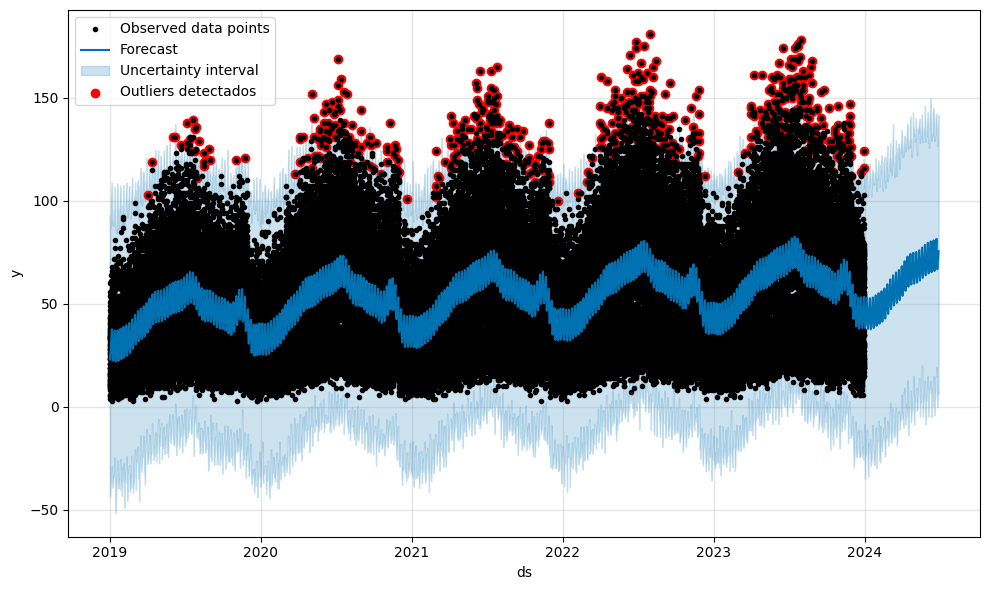

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparamos los datos para Prophet
df_prophet = df[['Fecha Pedido', 'Ventas']].rename(columns={'Fecha Pedido': 'ds', 'Ventas': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# 2. Inicializamos el modelo Prophet
model = Prophet(interval_width=0.99)  # Ajustar el intervalo de confianza al 95%

# 3. Ajustamos el modelo con los datos
model.fit(df_prophet)

# 4. Generamos fechas futuras para el pron√≥stico (180 d√≠as hacia adelante)
future = model.make_future_dataframe(periods=180, freq='D')

# 5. Realizamos el pron√≥stico
forecast = model.predict(future)

# 6. Alineamos las predicciones con los datos hist√≥ricos
# Nos quedamos solo con las predicciones correspondientes a las fechas hist√≥ricas
forecast_historical = forecast[forecast['ds'] <= df_prophet['ds'].max()]

# 7. Volvemos a unir las predicciones con los valores reales de ventas
df_merged = pd.merge(df_prophet, forecast_historical[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# 8. Identificamos outliers
df_merged['anomaly'] = (df_merged['y'] > df_merged['yhat_upper']) | (df_merged['y'] < df_merged['yhat_lower'])

# 9. Extraemos los outliers
outliers = df_merged[df_merged['anomaly'] == True]

# 10. Imprimimos los outliers detectados
print(outliers)

# 11. Visualizamos el pron√≥stico y los outliers
fig = model.plot(forecast)
plt.scatter(outliers['ds'], outliers['y'], color='red', label='Outliers detectados')
plt.legend()
plt.show()


In [ ]:
# Contamos el n√∫mero de outliers en el DataFrame
num_outliers = df_merged['anomaly'].sum()

# Imprimimos el n√∫mero total de outliers
print(f"N√∫mero total de outliers detectados: {num_outliers}")


N√∫mero total de outliers detectados: 572


In [ ]:
df_merged.loc[df_merged['anomaly'], 'y'] = df_merged.loc[df_merged['anomaly'], 'yhat']

## **2. ¬øC√≥mo se relacionan las diferentes variables entre s√≠ y con la variable objetivo (ventas)?**
**Prop√≥sito:** Evaluar las correlaciones y relaciones entre las variables que puedan influir en la predicci√≥n.
* **Preguntas relacionadas:**
1. ¬øExisten correlaciones fuertes entre las variables categ√≥ricas, num√©ricas y la variable objetivo (ventas)?
2. ¬øQu√© conclusiones se pueden extraer de la prueba de hip√≥tesis en las variables clave?
3. ¬øC√≥mo impactan transformaciones b√°sicas como Label Encoding y variables derivadas de la fecha en las ventas?
* **Acciones en el EDA:**
1. Aplicar transformaciones b√°sicas como Label Encoding y la creaci√≥n de nuevas features derivadas de la fecha.
2. Realizar una prueba de hip√≥tesis para verificar si ciertas variables tienen un impacto significativo en las ventas.
3. Aplicar transformaciones en los datos como Lag/Shifted Features y Rolling Mean para enriquecer las caracter√≠sticas y observar su impacto en la correlaci√≥n.

## **Correlacion Entre Variables**
La correlaci√≥n es una medida estad√≠stica que describe la relaci√≥n entre dos variables. En el an√°lisis de datos, es √∫til identificar correlaciones fuertes entre variables porque pueden ayudar a explicar el comportamiento de la variable objetivo. Es importante distinguir entre correlaci√≥n y causalidad: una correlaci√≥n alta no implica necesariamente que una variable cause cambios en la otra.

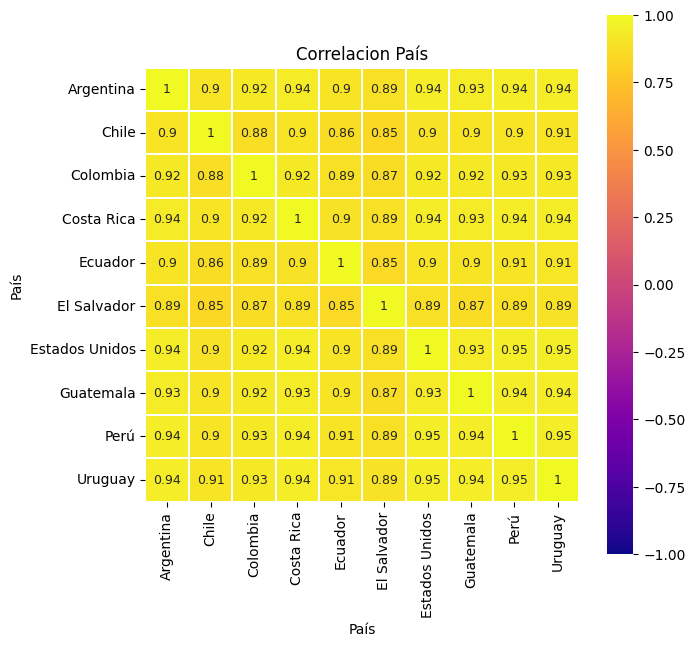

In [ ]:
pais_ventas = df.groupby(['Fecha Pedido', 'Pa√≠s']).Ventas.sum().reset_index().set_index('Fecha Pedido')
categoria_ventas = df.groupby(['Fecha Pedido', 'Categor√≠a Tarjeta']).Ventas.sum().reset_index().set_index('Fecha Pedido')

corr =  pd.pivot_table(pais_ventas, values = 'Ventas', columns='Pa√≠s', index='Fecha Pedido').corr(method = "spearman")

plt.figure(figsize = (7,7))
plt.title('Correlacion Pa√≠s' )
sns.heatmap(corr,
            cmap='plasma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True);

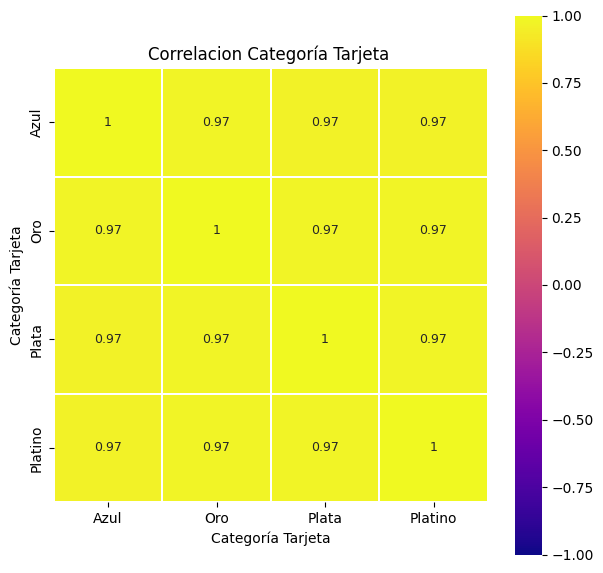

In [ ]:
corr =  pd.pivot_table(categoria_ventas, values = 'Ventas', columns='Categor√≠a Tarjeta', index='Fecha Pedido').corr(method = "spearman")

plt.figure(figsize = (7,7))
plt.title('Correlacion Categor√≠a Tarjeta ' )
sns.heatmap(corr,
            cmap='plasma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True);

# **Prueba de Hip√≥tesis**
La prueba de hip√≥tesis nos permite validar o refutar suposiciones sobre las diferencias entre grupos, como categor√≠as de tarjetas o pa√≠ses, y su impacto en las ventas. Nos ayuda a identificar si las diferencias observadas en las ventas entre estos grupos son significativas o pueden atribuirse al azar.

* **Flujo del Proceso:**
1. **Comparaci√≥n de Grupos:** Se comparan grupos (por ejemplo, categor√≠as de tarjetas) para verificar si hay diferencias significativas en sus ventas.

2. **Test de Normalidad (Shapiro-Wilk):** Determina si los datos de los grupos siguen una distribuci√≥n normal. Dependiendo de los resultados, se elige entre una prueba param√©trica o no param√©trica.

3. **Test de Homogeneidad (Levene):** Eval√∫a si las varianzas de los grupos son homog√©neas. Si lo son, se usa una prueba t con varianzas iguales, de lo contrario, se aplica una prueba t con varianzas desiguales.

4. **Pruebas Param√©tricas o No Param√©tricas:**

* **Prueba t de Student:** Para datos normales con varianzas homog√©neas.
* **Prueba de Mann-Whitney U:** Para datos no normales o con varianzas heterog√©neas.
5. **Conclusi√≥n:** Si el p-valor es menor a 0.05, las diferencias observadas entre los grupos son estad√≠sticamente significativas.

In [ ]:
import itertools
from scipy.stats import shapiro
from scipy.stats import stats
from scipy.stats import mannwhitneyu


def Comparar_dos_grupos(dataframe, grupo, objetivo):

  #1. Test de Normalidad = Shapiro Test
  #2 Test Homogeneidad = Levene Test
  #3. T Test Parametricos / No Parametricos

  item_comb = list(itertools.combinations(dataframe[grupo].unique(),2))

  AB = pd.DataFrame()

  for i in range(0, len(item_comb)):
    grupoA = dataframe[dataframe[grupo] == item_comb[i][0]][objetivo]
    grupoB = dataframe[dataframe[grupo] == item_comb[i][1]][objetivo]

    #Asumir que nuestros datos tienen distribucion Normal

    ntA = shapiro(grupoA)[1] <0.05
    ntB = shapiro(grupoB)[1] <0.05

    #H0: Distribucion es normal / False
    #H1: Distribucion no es normal / True

    if (ntA == False) & (ntB == False):## H0: Distribucion Normal
    #Prueba Parametrica
    #Asumir la homogeneidad de las variables

      leveneTest = stats.levene(grupoA, grupoB)[1]< 0.05

      #H0:Homogeneidad = False
      #H1: Homogeneidad = True

      if leveneTest == False:
        #Homogeneidad
        ttest = stats.ttest_ind(grupoA, grupoB, equal_var = True)[1]
      else:
        #Heterogenea
        ttest = stats.ttest_ind(grupoA, grupoB, equal_var = False)[1]
    else:
      #Test No Parametrica
      ttest = mannwhitneyu(grupoA, grupoB)[1]

    temp = pd.DataFrame({'Comparacion 2 Grupos':[ttest < 0.05],
                         'p-value':[ttest],
                         'Media_GrupoA':[grupoA.mean()],'Media_GrupoB':[grupoB.mean()],
                         'Mediana_GrupoA':[grupoA.median()], 'Mediana_GrupoB':[grupoB.median()],
                         'Cantidad_GrupoA':[grupoA.count()],'Cantidad_GrupoB':[grupoB.count()],
                         },index =[item_comb[i]])
    temp['Comparacion 2 Grupos'] = np.where(temp['Comparacion 2 Grupos'] == True, 'Grupos Diferentes',
                                            'Grupo Similares')
    temp['Tipo Prueba'] = np.where((ntA == False)& (ntB == False),'Parametrico', 'No Parametrico')

    AB = pd.concat([AB, temp[['Tipo Prueba','Comparacion 2 Grupos','p-value',
                              'Mediana_GrupoA','Mediana_GrupoB','Media_GrupoA','Media_GrupoB',
                              'Cantidad_GrupoA','Cantidad_GrupoB']]])
  return AB



#Comparar_dos_grupos(pais_ventas, grupo='Pa√≠s',objetivo='Ventas')

item_similares = Comparar_dos_grupos(categoria_ventas,grupo='Categor√≠a Tarjeta',objetivo='Ventas')

#item_similares[item_similares['Comparacion 2 Grupos']=='Grupo Similares']
item_similares

Tipo Prueba Comparacion 2 Grupos        p-value  \
(Azul, Oro)       No Parametrico    Grupos Diferentes  5.841133e-257   
(Azul, Plata)     No Parametrico    Grupos Diferentes  1.130584e-131   
(Azul, Platino)   No Parametrico    Grupos Diferentes   3.341555e-60   
(Oro, Plata)      No Parametrico    Grupos Diferentes   2.590684e-39   
(Oro, Platino)    No Parametrico    Grupos Diferentes  3.092130e-102   
(Plata, Platino)  No Parametrico    Grupos Diferentes   6.933354e-20   

                  Mediana_GrupoA  Mediana_GrupoB  Media_GrupoA  Media_GrupoB  \
(Azul, Oro)                425.0           605.0    431.136986    611.052603   
(Azul, Plata)              425.0           535.0    431.136986    542.761096   
(Azul, Platino)            425.0           494.0    431.136986    500.722740   
(Oro, Plata)               605.0           535.0    611.052603    542.761096   
(Oro, Platino)             605.0           494.0    611.052603    500.722740   
(Plata, Platino)           535.0           494.0    542.761096    500.722740   

                  Cantidad_GrupoA  Cantidad_GrupoB  
(Azul, Oro)                  1825             1825  
(Azul, Plata)                1825             1825  
(Azul, Platino)              1825             1825  
(Oro, Plata)                 1825             1825  
(Oro, Platino)               1825             1825  
(Plata, Platino)             1825             1825

# **Feature Engineering**
El Feature Engineering es el proceso de transformar los datos crudos en caracter√≠sticas que mejor representen los patrones en los datos, lo cual es esencial para mejorar el rendimiento de los modelos predictivos. Algunas t√©cnicas incluyen la creaci√≥n de nuevas variables a partir de las existentes (como caracter√≠sticas temporales), la normalizaci√≥n o el escalado de datos.

In [ ]:
label_encoder_pais = LabelEncoder()
label_encoder_categoria = LabelEncoder()

# Aplicamos label encoding a las columnas 'Pa√≠s' y 'Categor√≠a Tarjeta'
df['Pa√≠s'] = label_encoder_pais.fit_transform(df['Pa√≠s']) + 1
df['Categor√≠a Tarjeta'] = label_encoder_categoria.fit_transform(df['Categor√≠a Tarjeta']) + 1


In [ ]:
df.head()

Fecha Pedido  Categor√≠a Tarjeta  Pa√≠s  Ventas
0   2019-01-01                  1     5      13
1   2019-01-02                  1     5      11
2   2019-01-03                  1     5      14
3   2019-01-04                  1     5      13
4   2019-01-05                  1     5      10

In [ ]:
url_test = "https://raw.githubusercontent.com/emadrigals104/PLFPython/main/Datasets/df_test.csv"

df_test = pd.read_csv(url_test,
                 sep=',',header=0,parse_dates=['Fecha Pedido'])

In [ ]:
df_test

id Fecha Pedido  Categor√≠a Tarjeta  Pa√≠s
0        0   2024-01-01                  1     1
1        1   2024-01-02                  1     1
2        2   2024-01-03                  1     1
3        3   2024-01-04                  1     1
4        4   2024-01-05                  1     1
...    ...          ...                ...   ...
3595  8455   2024-03-27                  4    10
3596  8456   2024-03-28                  4    10
3597  8457   2024-03-29                  4    10
3598  8458   2024-03-30                  4    10
3599  8459   2024-03-31                  4    10

[3600 rows x 4 columns]

In [ ]:
df = pd.concat([df, df_test], sort=False)

In [ ]:
def create_date_features(df):
    df['nro_mes'] = df['Fecha Pedido'].dt.month
    df['dia_mes'] = df['Fecha Pedido'].dt.day
    df['dia_anio'] = df['Fecha Pedido'].dt.dayofyear
    df['semana_anio'] = df['Fecha Pedido'].dt.isocalendar().week
    df['dia_semana'] = df['Fecha Pedido'].dt.dayofweek + 1
    df['anio'] = df['Fecha Pedido'].dt.year
    df["fin_semana"] = df['Fecha Pedido'].dt.weekday // 4
    df["trimestre"] = df['Fecha Pedido'].dt.quarter
    df['inicio_mes'] = df['Fecha Pedido'].dt.is_month_start.astype(int)
    df['fin_mes'] = df['Fecha Pedido'].dt.is_month_end.astype(int)
    df['inicio_trim'] = df['Fecha Pedido'].dt.is_quarter_start.astype(int)
    df['fin_trim'] = df['Fecha Pedido'].dt.is_quarter_end.astype(int)
    df['inicio_anio'] = df['Fecha Pedido'].dt.is_year_start.astype(int)
    df['fin_anio'] = df['Fecha Pedido'].dt.is_year_end.astype(int)
    # 1: Invierno - 2: Verano
    df["estacion"] = np.where(df.nro_mes.isin([12,1,2,3,4]), 2, 1)
    return df
df = create_date_features(df)

df.head()

Fecha Pedido  Categor√≠a Tarjeta  Pa√≠s  Ventas  id  nro_mes  dia_mes  \
0   2019-01-01                  1     5    13.0 NaN        1        1   
1   2019-01-02                  1     5    11.0 NaN        1        2   
2   2019-01-03                  1     5    14.0 NaN        1        3   
3   2019-01-04                  1     5    13.0 NaN        1        4   
4   2019-01-05                  1     5    10.0 NaN        1        5   

   dia_anio  semana_anio  dia_semana  anio  fin_semana  trimestre  inicio_mes  \
0         1            1           2  2019           0          1           1   
1         2            1           3  2019           0          1           0   
2         3            1           4  2019           0          1           0   
3         4            1           5  2019           1          1           0   
4         5            1           6  2019           1          1           0   

   fin_mes  inicio_trim  fin_trim  inicio_anio  fin_anio  estacion  
0        0            1         0            1         0         2  
1        0            0         0            0         0         2  
2        0            0         0            0         0         2  
3        0            0         0            0         0         2  
4        0            0         0            0         0         2

## **3. ¬øC√≥mo podemos enriquecer los datos para mejorar las predicciones?**
**Prop√≥sito:** Aplicar transformaciones avanzadas de features para mejorar el rendimiento del modelo.
* **Preguntas relacionadas:**
1. ¬øQu√© impacto tiene la adici√≥n de Random Noise para mejorar la generalizaci√≥n del modelo?
2. ¬øC√≥mo pueden las Lag/Shifted Features y la Media M√≥vil capturar la din√°mica temporal de las ventas?
3. ¬øQu√© mejoras aportan las Exponentially Weighted Mean Features y el One-Hot Encoding en el modelo?
* **Acciones en el EDA:**
1. Aplicar Random Noise para reducir la varianza y evitar overfitting.
2. Crear Lag/Shifted Features para capturar las tendencias a lo largo del tiempo y calcular la Media M√≥vil para suavizar fluctuaciones.
3. Implementar Exponentially Weighted Mean Features para enfatizar valores recientes y aplicar One-Hot Encoding para mejorar la representaci√≥n de las variables categ√≥ricas.

## **Random Noise**
El random noise se refiere a la variabilidad aleatoria que no puede ser explicada por el modelo. En algunas ocasiones, se puede a√±adir ruido aleatorio a los datos para evitar que los modelos se ajusten demasiado a los patrones existentes (overfitting), promoviendo la generalizaci√≥n a datos nuevos.

In [ ]:
def random_noise(dataframe):

    return np.random.normal(size=(len(dataframe),))

## **Lag/Shifted Features**
Las lag features (caracter√≠sticas rezagadas) son variables que se desplazan en el tiempo, es decir, representan valores pasados de la misma serie temporal. Son √∫tiles en la predicci√≥n de series temporales porque permiten que el modelo tenga en cuenta patrones pasados para predecir valores futuros.


In [ ]:
df.sort_values(by=['Pa√≠s', 'Categor√≠a Tarjeta', 'Fecha Pedido'], axis=0, inplace=True)

def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['Ventas_lag_' + str(lag)] = dataframe.groupby(["Pa√≠s", "Categor√≠a Tarjeta"])['Ventas'].transform(
            lambda x: x.shift(lag)) + random_noise(dataframe)
    return dataframe

df = lag_features(df, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

## **Rolling Mean / Moving Average**
El promedio m√≥vil es una t√©cnica que suaviza la serie temporal al promediar los datos a lo largo de una ventana de tiempo definida. Es √∫til para identificar la tendencia a largo plazo y reducir el impacto de fluctuaciones a corto plazo.

In [ ]:
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['Ventas_roll_mean_' + str(window)] = dataframe.groupby(["Pa√≠s", "Categor√≠a Tarjeta"])['Ventas']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe


df = roll_mean_features(df, [365, 546, 730])

## **Exponentially Weighted Mean Features**
Las caracter√≠sticas de media ponderada exponencialmente otorgan m√°s peso a los datos recientes en una serie temporal, permitiendo que el modelo responda m√°s r√°pidamente a los cambios recientes en el comportamiento de los datos.

In [ ]:
def ewm_features(dataframe, alphas, lags):
    dataframe = dataframe.copy()
    for alpha in alphas:
        for lag in lags:
            dataframe['Ventas_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["Pa√≠s", "Categor√≠a Tarjeta"])['Ventas']. \
                    transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

alphas = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

df = ewm_features(df, alphas, lags)
df.tail()

Fecha Pedido  Categor√≠a Tarjeta  Pa√≠s  Ventas      id  nro_mes  dia_mes  \
3595   2024-03-27                  4    10     NaN  8455.0        3       27   
3596   2024-03-28                  4    10     NaN  8456.0        3       28   
3597   2024-03-29                  4    10     NaN  8457.0        3       29   
3598   2024-03-30                  4    10     NaN  8458.0        3       30   
3599   2024-03-31                  4    10     NaN  8459.0        3       31   

      dia_anio  semana_anio  dia_semana  anio  fin_semana  trimestre  \
3595        87           13           3  2024           0          1   
3596        88           13           4  2024           0          1   
3597        89           13           5  2024           1          1   
3598        90           13           6  2024           1          1   
3599        91           13           7  2024           1          1   

      inicio_mes  fin_mes  inicio_trim  fin_trim  inicio_anio  fin_anio  \
3595           0        0            0         0            0         0   
3596           0        0            0         0            0         0   
3597           0        0            0         0            0         0   
3598           0        0            0         0            0         0   
3599           0        1            0         1            0         0   

      estacion  Ventas_lag_91  Ventas_lag_98  Ventas_lag_105  Ventas_lag_112  \
3595         2      64.339611      61.787176       70.702534       61.186172   
3596         2      72.896146      56.653568       72.866294       81.038035   
3597         2      58.851038      66.907980       72.241410       71.616458   
3598         2      53.809897      84.273706       66.151663       83.218616   
3599         2      75.120950      87.908604       84.144343       71.046231   

      Ventas_lag_119  Ventas_lag_126  Ventas_lag_182  Ventas_lag_364  \
3595       92.972413      103.571616       86.592810       86.171597   
3596      111.568769       93.631837       90.125085       67.333842   
3597       96.630608       86.013130      101.585157       83.029006   
3598       76.027816       96.564380      115.250231       91.559651   
3599       73.509212       95.690979      102.161260      103.614709   

      Ventas_lag_546  Ventas_lag_728  Ventas_roll_mean_365  \
3595       91.658517       66.081866             98.783948   
3596       83.958568       72.726872             99.274707   
3597       89.494896       65.157276             97.986502   
3598      108.944139       85.963337             97.402170   
3599      110.628565       87.842147             98.871157   

      Ventas_roll_mean_546  Ventas_roll_mean_730  Ventas_ewm_alpha_099_lag_91  \
3595             95.281759             90.291546                    63.971708   
3596             93.447916             93.055491                    71.919717   
3597             93.957494             89.910095                    59.129197   
3598             95.909935             91.892373                    53.061292   
3599             95.964975             93.355748                    75.770613   

      Ventas_ewm_alpha_099_lag_98  Ventas_ewm_alpha_099_lag_105  \
3595                    61.883203                     69.871895   
3596                    56.058832                     73.958719   
3597                    64.910588                     70.039587   
3598                    83.809106                     68.020396   
3599                    85.978091                     84.830204   

      Ventas_ewm_alpha_099_lag_112  Ventas_ewm_alpha_099_lag_180  \
3595                     61.835671                    100.899287   
3596                     80.808357                    114.858993   
3597                     72.088084                    104.108590   
3598                     83.880881                    107.961086   
3599                     71.128809                     79.289611   

      Ventas_ewm_alpha_099_lag_270  Ventas_ewm_alpha

## **One-Hot Encoding**
El One-Hot Encoding es una t√©cnica de transformaci√≥n de datos categ√≥ricos en variables num√©ricas. Cada categor√≠a se convierte en una nueva columna binaria (0 o 1), lo que permite a los algoritmos de machine learning trabajar con variables categ√≥ricas.

In [ ]:
df = pd.get_dummies(df, columns=['dia_semana', 'nro_mes'])

df['Ventas'] = np.log1p(df["Ventas"].values)
df['Ventas'].head()

7300    3.526361
7301    3.784190
7302    3.178054
7303    2.944439
7304    3.555348
Name: Ventas, dtype: float64

In [ ]:
df.shape

(76600, 104)

**Reemplazar espacios en blanco por guiones**

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

## **Train - Test - Split**
Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es esencial para evaluar la capacidad del modelo para generalizar a datos no vistos. El modelo se entrena con los datos de entrenamiento y se eval√∫a con los datos de prueba para medir su precisi√≥n y evitar el overfitting.

In [ ]:
# Los datos se deben ordenar para separar las series temporales
df = df.sort_values("Fecha_Pedido").reset_index(drop = True)

# Train Validation Split
# Validacion Incluye 3 Meses (Oct. Nov. Dec. 2013)
train = df.loc[(df["Fecha_Pedido"] < "2023-10-01"), :]
val = df.loc[(df["Fecha_Pedido"] >= "2023-10-01") & (df["Fecha_Pedido"] < "2024-01-01"), :]


cols = [col for col in train.columns if col not in ['Fecha_Pedido','ID', 'Ventas', 'anio']]

Y_train = train['Ventas']
X_train = train[cols]

Y_val = val['Ventas']
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((69320,), (69320, 101), (3680,), (3680, 101))

## **4. ¬øQu√© tan efectivo es el modelo actual y c√≥mo podemos optimizarlo?**
**Prop√≥sito:** Evaluar el rendimiento del modelo y ajustarlo mediante t√©cnicas de optimizaci√≥n.
* **Preguntas relacionadas:**
1. ¬øQu√© tan precisas son las predicciones basadas en la funci√≥n de costo SMAPE?
2. ¬øC√≥mo podemos ajustar el modelo utilizando hiperpar√°metros para obtener mejores resultados?
3. ¬øQu√© variables tienen m√°s influencia seg√∫n el Feature Importance?
* **Acciones en el EDA:**
1. Utilizar SMAPE como m√©trica de evaluaci√≥n para medir el rendimiento del modelo.
2. Aplicar t√©cnicas de optimizaci√≥n de hiperpar√°metros para mejorar el modelo LightGBMRegressor.
3. Analizar el Feature Importance para identificar las variables m√°s relevantes y optimizar el modelo.

## **Funcion de Costo SMAPE**
La SMAPE (Symmetric Mean Absolute Percentage Error) es una m√©trica utilizada para evaluar el rendimiento de modelos de predicci√≥n, especialmente en series temporales. La SMAPE calcula el error absoluto entre las predicciones y los valores reales, normalizado por la suma de los valores absolutos de los datos reales y predichos, lo que la hace m√°s robusta frente a valores extremos.

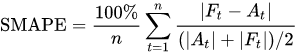

In [ ]:
# SMAPE: Error porcentual absoluto medio sim√©trico (MAPE ajustado)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def lgbm_smape(y_true, y_pred):
    smape_val = smape(y_true, y_pred)
    return 'SMAPE', smape_val, False

## **Modelo LGMRegressor**
LGBMRegressor es un modelo basado en LightGBM (Light Gradient Boosting Machine), una implementaci√≥n r√°pida y eficiente del algoritmo de boosting de √°rboles. Es particularmente √∫til para grandes conjuntos de datos y ha demostrado un rendimiento superior en muchas tareas de predicci√≥n.

El objetivo es encontrar un modelo ùêπ(ùë•) que minimice la p√©rdida entre las predicciones y los valores reales. Esto se logra mediante la adici√≥n de predictores de forma iterativa.

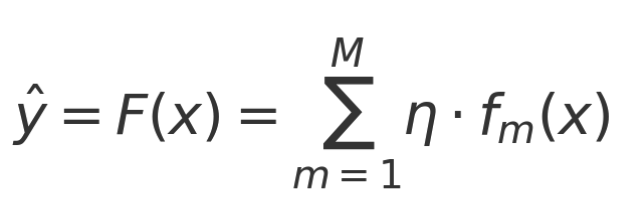


* y^:es la predicci√≥n final del modelo.
* ùëÄ: es el n√∫mero total de √°rboles.
* ùúÇ: es la tasa de aprendizaje (learning rate).
* ùëìùëö(ùë•) es el ùëö-√©simo √°rbol de decisi√≥n.
* ùë•: es el conjunto de caracter√≠sticas de entrada.

In [ ]:
modelo_1 = lgb.LGBMRegressor(random_state=384,force_col_wise=True).fit(X_train, Y_train,
                                                      eval_metric= lambda y_true, y_pred: [lgbm_smape(y_true, y_pred)])

print("TRAIN SMAPE:", smape(Y_train, modelo_1.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, modelo_1.predict(X_val)))

[LightGBM] [Info] Total Bins 17502
[LightGBM] [Info] Number of data points in the train set: 69320, number of used features: 100
[LightGBM] [Info] Start training from score 3.809680
TRAIN SMAPE: 3.597660818142785
VALID SMAPE: 3.5827200287414085


## **Feature Importance**
La importancia de caracter√≠sticas es una m√©trica que indica qu√© variables son m√°s relevantes para el modelo predictivo. En LightGBM, se puede observar qu√© variables aportan m√°s al proceso de toma de decisiones del modelo, lo que ayuda a interpretar los resultados.

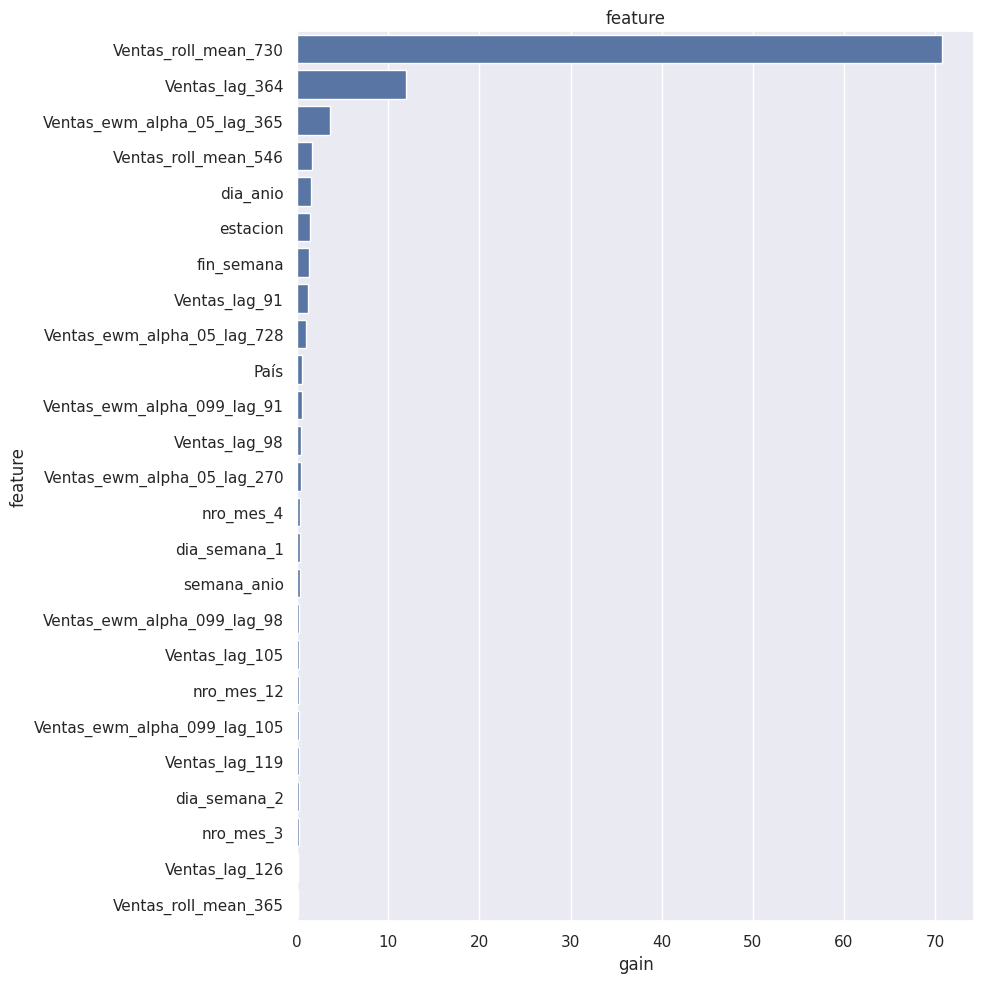

                          feature  split       gain
27           Ventas_roll_mean_730    137  70.754322
22                 Ventas_lag_364    263  11.905903
79    Ventas_ewm_alpha_05_lag_365    104   3.646809
26           Ventas_roll_mean_546     92   1.672742
4                        dia_anio    257   1.524538
14                       estacion     47   1.382641
6                      fin_semana     71   1.236558
15                  Ventas_lag_91     49   1.143154
81    Ventas_ewm_alpha_05_lag_728    115   0.988462
1                            Pa√≠s     99   0.487863
28    Ventas_ewm_alpha_099_lag_91     31   0.480745
16                  Ventas_lag_98     38   0.420537
78    Ventas_ewm_alpha_05_lag_270     47   0.400275
92                      nro_mes_4     24   0.354164
82                   dia_semana_1    118   0.294630
5                     semana_anio     49   0.273750
29    Ventas_ewm_alpha_099_lag_98     27   0.239749
17                 Ventas_lag_105     38   0.209157
100        

In [ ]:
def plot_lgb_importances(model,plot=True,num=10):
    from matplotlib import pyplot as plt
    import seaborn as sns
    gain = model.booster_.feature_importance(importance_type='gain')
    feat_imp = pd.DataFrame({'feature': model.booster_.feature_name(),
                             'split': model.booster_.feature_importance(importance_type='split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
    print(feat_imp.head(num))

feature_imp_df = plot_lgb_importances(modelo_1, num=50)

## **Analisis del Error**
El an√°lisis del error se enfoca en identificar y comprender las predicciones err√≥neas del modelo. Esto implica revisar las diferencias entre los valores predichos y los reales, buscando patrones que puedan indicar problemas en los datos o en el modelo.

In [ ]:
error = pd.DataFrame({
    "Fecha Pedido":val.Fecha_Pedido,
    "Pa√≠s":X_val.Pa√≠s,
    "Categor√≠a Tarjeta":X_val.Categor√≠a_Tarjeta,
    "actual":Y_val,
    "pred":modelo_1.predict(X_val)
}).reset_index(drop = True)

error["error"] = np.abs(error.actual-error.pred)

error.sort_values("error", ascending=False).head(10)

Fecha Pedido  Pa√≠s  Categor√≠a Tarjeta    actual      pred     error
3289   2023-12-22     5                  1  1.945910  2.896632  0.950722
624    2023-10-16     5                  4  2.302585  3.185150  0.882565
1175   2023-10-30     2                  1  2.079442  2.890240  0.810798
2755   2023-12-08     6                  1  1.945910  2.732320  0.786410
2591   2023-12-04     5                  2  2.397895  3.180563  0.782668
1226   2023-10-31     6                  3  2.302585  3.054218  0.751633
3300   2023-12-22     6                  1  1.945910  2.658860  0.712950
3510   2023-12-27     6                  1  1.945910  2.621056  0.675146
79     2023-10-02     6                  4  2.197225  2.868438  0.671213
2595   2023-12-04     5                  1  2.079442  2.740653  0.661212

In [ ]:
error[["actual", "pred", "error"]].describe([0.7, 0.8, 0.9, 0.95, 0.99]).T

count      mean       std       min       50%       70%       80%  \
actual  3680.0  3.868139  0.571015  1.945910  3.988984  4.262680  4.382027   
pred    3680.0  3.879210  0.557521  2.451230  4.006440  4.253371  4.386377   
error   3680.0  0.129751  0.109721  0.000017  0.105474  0.161435  0.204688   

             90%       95%       99%       max  
actual  4.532599  4.644391  4.828314  4.997212  
pred    4.543677  4.650978  4.796390  4.944189  
error   0.275418  0.343316  0.478819  0.950722

## **HiperParametros - Optimizacion del Modelo**
La optimizaci√≥n de hiperpar√°metros es el proceso de ajustar los par√°metros del modelo (como la tasa de aprendizaje o el n√∫mero de √°rboles en un algoritmo de boosting) para maximizar su rendimiento. Este proceso se realiza a menudo mediante t√©cnicas de b√∫squeda en cuadr√≠cula (grid search) o b√∫squeda aleatoria (random search).

In [ ]:
lgbm_params = {
"num_leaves":[20,31], # Default 31
"max_depth":[-1, 20, 30], # Default -1
"learning_rate":[0.1, 0.05], # Default 0.1
"n_estimators":[10000,15000], # Default 100
"min_split_gain":[0.0, 2,5], # Default 0
"min_child_samples":[10, 20, 30], # Default 20
"colsample_bytree":[0.5, 0.8, 1.0], # Default 1
"reg_alpha":[0.0, 0.5, 1], # Default 0
"reg_lambda":[0.0, 0.5, 1] # Default 0
}

In [ ]:
from lightgbm import early_stopping

# Ajustar el modelo con parada temprana usando callbacks
modelo_2 = lgb.LGBMRegressor(num_leaves=31, n_estimators=2000, max_depth=20, random_state=384, metric="custom")

modelo_2.fit(
    X_train[cols], Y_train,
    eval_set=[(X_val[cols], Y_val)],  # Conjunto de validaci√≥n
    eval_metric=lambda y_true, y_pred: [lgbm_smape(y_true, y_pred)],
    callbacks=[early_stopping(stopping_rounds=100)]  # Callback para la parada temprana
)
print("Mejor Iteracion:", modelo_2.booster_.best_iteration)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17502
[LightGBM] [Info] Number of data points in the train set: 69320, number of used features: 100
[LightGBM] [Info] Start training from score 3.809680
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[194]	valid_0's SMAPE: 3.56503
Mejor Iteracion: 194


In [ ]:
df.sort_values(["Pa√≠s", "Categor√≠a_Tarjeta", "Fecha_Pedido"], inplace = True)

train_final = df.loc[(df["Fecha_Pedido"] < "2024-01-01"), :]
test_final = df.loc[(df["Fecha_Pedido"] >= "2024-01-01"), :]

X_train_final = train_final[cols]
Y_train_final = train_final.Ventas
X_test_final = test_final[cols]

final_model = lgb.LGBMRegressor(num_leaves=31, n_estimators=15000, max_depth=20, random_state=384, metric = "custom")
final_model.set_params(n_estimators=modelo_2.booster_.best_iteration)
final_model.fit(X_train_final[cols], Y_train_final,
                eval_metric= lambda y_true, y_pred: [lgbm_smape(y_true, y_pred)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17502
[LightGBM] [Info] Number of data points in the train set: 73000, number of used features: 100
[LightGBM] [Info] Start training from score 3.812627


LGBMRegressor(max_depth=20, metric='custom', n_estimators=194, random_state=384)

### **Invertir transformaci√≥n**

In [ ]:
train_final['Categor√≠a_Tarjeta'] = train_final['Categor√≠a_Tarjeta'] - 1
train_final['Categor√≠a_Tarjeta'] = label_encoder_categoria.inverse_transform(train_final['Categor√≠a_Tarjeta'])

test_final['Categor√≠a_Tarjeta'] = test_final['Categor√≠a_Tarjeta'] - 1
test_final['Categor√≠a_Tarjeta'] = label_encoder_categoria.inverse_transform(test_final['Categor√≠a_Tarjeta'])

In [ ]:
train_final['Pa√≠s'] = train_final['Pa√≠s'] - 1
train_final['Pa√≠s'] = label_encoder_pais.inverse_transform(train_final['Pa√≠s'])

test_final['Pa√≠s'] = test_final['Pa√≠s'] - 1
test_final['Pa√≠s'] = label_encoder_pais.inverse_transform(test_final['Pa√≠s'])

## **5. ¬øC√≥mo se comportan las predicciones y c√≥mo podemos visualizarlas?**
**Prop√≥sito:** Generar y analizar las predicciones del modelo, visualizando los resultados de manera comprensible.
* **Preguntas relacionadas:**
1. ¬øC√≥mo se comportan las predicciones en comparaci√≥n con los datos reales?
2. ¬øQu√© podemos inferir al comparar las predicciones con la tendencia y la estacionalidad observadas?
3. ¬øC√≥mo podemos visualizar las predicciones de manera clara para extraer conclusiones √∫tiles?
* **Acciones en el EDA:**
1. Generar las predicciones utilizando el modelo final.
2. Guardar las predicciones y crear visualizaciones que comparen las predicciones con los datos reales, mostrando tambi√©n las tendencias.
3. Usar gr√°ficos para visualizar la tendencia, estacionalidad, y las predicciones de manera que faciliten su interpretaci√≥n.

### **Generar las predicciones utilizando el modelo final**

In [ ]:
# Generar las predicciones utilizando el modelo final
predicciones = final_model.predict(X_test_final)

# Crear un DataFrame para las predicciones y el train
train_final['Tipo'] = 'Train'
test_final['Pred'] = predicciones

# Configurar 'Fecha_Pedido' como √≠ndice
train_final.set_index('Fecha_Pedido', inplace=True)
test_final.set_index('Fecha_Pedido', inplace=True)

# Resamplear solo las columnas num√©ricas (por semana)
train_resampled = train_final[['Ventas']].resample('W').mean().reset_index()
test_resampled = test_final[['Pred']].resample('W').mean().reset_index()
test_resampled_real = test_final[['Ventas']].resample('W').mean().reset_index()

In [ ]:
train_final.reset_index(inplace=True)
test_final.reset_index(inplace=True)

In [ ]:
test_final.head()

Fecha_Pedido Categor√≠a_Tarjeta       Pa√≠s  Ventas   id  dia_mes  dia_anio  \
0   2024-01-01              Azul  Argentina     NaN  0.0        1         1   
1   2024-01-02              Azul  Argentina     NaN  1.0        2         2   
2   2024-01-03              Azul  Argentina     NaN  2.0        3         3   
3   2024-01-04              Azul  Argentina     NaN  3.0        4         4   
4   2024-01-05              Azul  Argentina     NaN  4.0        5         5   

   semana_anio  anio  fin_semana  trimestre  inicio_mes  fin_mes  inicio_trim  \
0            1  2024           0          1           1        0            1   
1            1  2024           0          1           0        0            0   
2            1  2024           0          1           0        0            0   
3            1  2024           0          1           0        0            0   
4            1  2024           1          1           0        0            0   

   fin_trim  inicio_anio  fin_anio  estacion  Ventas_lag_91  Ventas_lag_98  \
0         0            1         0         2      54.498626      47.087911   
1         0            0         0         2      55.757164      59.862873   
2         0            0         0         2      53.898150      57.251749   
3         0            0         0         2      59.189438      55.999948   
4         0            0         0         2      53.557568      65.958359   

   Ventas_lag_105  Ventas_lag_112  Ventas_lag_119  Ventas_lag_126  \
0       47.696062       45.122954       51.815809       54.350709   
1       63.659772       57.563614       53.164296       41.636472   
2       61.445761       56.971857       68.334954       76.670058   
3       65.031348       69.644405       59.815729       54.765298   
4       71.160037       60.155600       65.002191       68.489799   

   Ventas_lag_182  Ventas_lag_364  Ventas_lag_546  Ventas_lag_728  \
0       52.516560       24.438438       63.842044       45.925962   
1       66.393397       33.140937       74.971773       21.336850   
2       67.683844       39.793819       75.321139       32.323551   
3       66.583981       38.957313       81.617818       38.867582   
4       79.812006       41.398441       89.006716       45.547622   

   Ventas_roll_mean_365  Ventas_roll_mean_546  Ventas_roll_mean_730  \
0             64.818601             59.474937             60.347687   
1             64.245467             59.041882             58.459141   
2             65.772868             59.484402             57.294659   
3             65.841884             58.197821             59.545881   
4             64.965155             56.879073             57.977201   

   Ventas_ewm_alpha_099_lag_91  Ventas_ewm_alpha_099_lag_98  \
0                    56.041887                    49.241185   
1                    55.010419                    60.882412   
2                    55.000104                    57.038824   
3                    58.960001                    55.020388   
4                    54.049600                    65.890204   

   Ventas_ewm_alpha_099_lag_105  Ventas_ewm_alpha_099_lag_112  \
0                     47.111685                     44.200694   
1                     65.811117                     57.862007   
2                     61.048111                     57.008620   
3                     65.950481                     70.860086   
4                     69.959505                     60.108601   

   Ventas_ewm_alpha_099_lag_180  Ventas_ewm_alpha_099_lag_270  \
0                     66.988646                     62.137690   
1                     66.999886                     62.001377   
2                     79.869999                     76.850014   
3                     93.858700                     85.908500   
4                     96.968587                     52.339085   

   Ventas_ewm_alpha_099_lag_365  Ventas_ewm_alpha_099_lag_546  \
0                     40.069019                     63.270490   
1                    

In [ ]:

# Crear la figura con Plotly
fig = make_subplots()

# L√≠nea de Train
fig.add_trace(go.Scatter(
    x=train_resampled['Fecha_Pedido'],
    y=train_resampled['Ventas'],
    mode='lines',
    name='Train',
    line=dict(color='green', width=2, dash='solid')
))

# L√≠nea de Predicciones
fig.add_trace(go.Scatter(
    x=test_resampled['Fecha_Pedido'],
    y=test_resampled['Pred'],
    mode='lines',
    name='Pred',
    line=dict(color='blue', width=2, dash='solid')
))

# A√±adir t√≠tulo y etiquetas a los ejes
fig.update_layout(
    title='Train vs Predicciones',
    xaxis_title='Fecha Pedido',
    yaxis_title='Ventas',
    template='plotly_white',
    width=900,
    height=500
)

# Mostrar la figura
fig.show()


## **Guardar la Prediccion**

In [ ]:
test_preds = final_model.predict(X_test_final)

submission = pd.DataFrame({
    "id":test_final.id.astype(int),
    "Ventas":np.expm1(test_preds)
})

submission.to_csv("submission.csv", index = None)

submission.head()

id     Ventas
0   0  36.332924
1   1  35.593857
2   2  39.246877
3   3  42.758534
4   4  45.279735

In [ ]:
forecast = pd.DataFrame({
    "Fecha Pedido":test_final["Fecha_Pedido"],
    "Pa√≠s":test_final["Pa√≠s"],
    "Categor√≠a Tarjeta":test_final["Categor√≠a_Tarjeta"],
    "Ventas":np.expm1(test_preds)
})

forecast.head()

Fecha Pedido       Pa√≠s Categor√≠a Tarjeta     Ventas
0   2024-01-01  Argentina              Azul  36.332924
1   2024-01-02  Argentina              Azul  35.593857
2   2024-01-03  Argentina              Azul  39.246877
3   2024-01-04  Argentina              Azul  42.758534
4   2024-01-05  Argentina              Azul  45.279735

# **Visualizaci√≥n de Predicciones**

In [ ]:
# Convertir las columnas a cadenas y crear la columna combinada 'Pais-Tarjeta'
forecast['Pa√≠s'] = forecast['Pa√≠s'].astype(str)
forecast['Categor√≠a Tarjeta'] = forecast['Categor√≠a Tarjeta'].astype(str)
forecast['Pais-Tarjeta'] = forecast['Pa√≠s'] + '_' + forecast['Categor√≠a Tarjeta']

# Pivotear los datos y hacer resample para obtener la media semanal
ventas = forecast.pivot_table(index='Fecha Pedido', columns='Pais-Tarjeta', values='Ventas', aggfunc='mean').resample('D').mean()
forecast.drop(columns=['Pais-Tarjeta'], inplace=True)

# Resetear el √≠ndice para que 'Fecha Pedido' sea una columna
ventas = ventas.reset_index()

# Obtener listas √∫nicas de pa√≠ses y categor√≠as de tarjetas
paises = forecast['Pa√≠s'].unique().tolist()
categorias_tarjeta = forecast['Categor√≠a Tarjeta'].unique().tolist()

In [ ]:
# Selecciones iniciales
pais = paises[0]
categoria = categorias_tarjeta[0]

i = pais + '_' + categoria

# Preparar la fuente de datos
fuente_ventas = pd.DataFrame({
    'Fecha Pedido': ventas['Fecha Pedido'],
    'y': ventas[i].values if i in ventas.columns else [0]*len(ventas)
})
source = ColumnDataSource(data=fuente_ventas)

# Preparar la fuente de datos de referencia
datos_ref = ventas.copy()
ref = ColumnDataSource(data=datos_ref)

# Crear la figura
p = figure(width=750, height=300, title=i, x_axis_type='datetime', tools="pan,wheel_zoom,reset")
linea = p.line(x='Fecha Pedido', y='y', source=source, color='blue', legend_label='Ventas')

# A√±adir tooltips
tooltips = [
    ('Fecha Pedido', '@{Fecha Pedido}{%F}'),
    ('Ventas', '@y'),
]

hover = HoverTool(
    tooltips=tooltips,
    formatters={'@{Fecha Pedido}': 'datetime'},
    mode='vline',
    renderers=[linea]
)
p.add_tools(hover)

# Crear widgets de selecci√≥n
select_pais = Select(title="Pa√≠s", value=pais, options=paises)
select_categoria = Select(title="Categor√≠a Tarjeta", value=categoria, options=categorias_tarjeta)

# Definir la callback
callback = CustomJS(
    args=dict(source=source, ref=ref, country_select=select_pais, category_select=select_categoria, p=p),
    code="""
    var pais = country_select.value;
    var categoria = category_select.value;
    var nombre_columna = pais + '_' + categoria;

    var datos = ref.data;
    var y_nueva = datos[nombre_columna];
    if (y_nueva === undefined) {
        y_nueva = Array(source.data['y'].length).fill(0);
    }

    source.data['y'] = y_nueva;
    p.title.text = nombre_columna;
    source.change.emit();
"""
)

# Conectar las callbacks a los widgets
select_pais.js_on_change('value', callback)
select_categoria.js_on_change('value', callback)

# Organizar el layout
layout = column(
    Div(text='<h4>Reporte de Ventas (Bokeh)</h4>'),
    row(select_pais, select_categoria),
    p
)

show(layout)